# Text Summarization & Visualization

## Setup
To prepare your environment, you need to install some packages.

### Install the necessary packages

You need the latest versions of these packages:<br>

In [1]:
!pip install gensim

Requirement not upgraded as not directly required: gensim in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages
Requirement not upgraded as not directly required: smart-open>=1.2.1 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from gensim)
Requirement not upgraded as not directly required: numpy>=1.11.3 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from gensim)
Requirement not upgraded as not directly required: scipy>=0.18.1 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from gensim)
Requirement not upgraded as not directly required: six>=1.5.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from gensim)
Requirement not upgraded as not directly required: boto>=2.32 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from smart-open>=1.2.1->gensim)
Requirement not upgraded as not directly required: requests in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from smart-open>=1.2.1->gensim)
Requirement not u

In [2]:
!pip install watson-developer-cloud==1.5

Requirement not upgraded as not directly required: watson-developer-cloud==1.5 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages
Requirement not upgraded as not directly required: Twisted>=13.2.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-developer-cloud==1.5)
Requirement not upgraded as not directly required: requests<3.0,>=2.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-developer-cloud==1.5)
Requirement not upgraded as not directly required: autobahn>=0.10.9 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-developer-cloud==1.5)
Requirement not upgraded as not directly required: service-identity>=17.0.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-developer-cloud==1.5)
Requirement not upgraded as not directly required: pyOpenSSL>=16.2.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-developer-cloud==1.5)
Requirement not upgraded as not dire

In [3]:
!pip install pyldavis

Requirement not upgraded as not directly required: pyldavis in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages
Requirement not upgraded as not directly required: funcy in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pyldavis)
Requirement not upgraded as not directly required: future in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pyldavis)
Requirement not upgraded as not directly required: jinja2>=2.7.2 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pyldavis)
Requirement not upgraded as not directly required: numexpr in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pyldavis)
Requirement not upgraded as not directly required: wheel>=0.23.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pyldavis)
Requirement not upgraded as not directly required: numpy>=1.9.2 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pyldavis)
Requirement not upgraded as not directly required: jobli

In [4]:
!pip install wordcloud

Requirement not upgraded as not directly required: wordcloud in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages
Requirement not upgraded as not directly required: numpy>=1.6.1 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from wordcloud)
Requirement not upgraded as not directly required: pillow in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from wordcloud)
Requirement not upgraded as not directly required: olefile in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pillow->wordcloud)


In [5]:
from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords
import watson_developer_cloud
import ibm_boto3
from botocore.client import Config
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import urllib
from bs4 import BeautifulSoup
import requests
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/dsxuser/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/dsxuser/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /home/dsxuser/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /home/dsxuser/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /home/dsxuser/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /home/dsxuser/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading p

True

## Read the Data
Click on Insert to code and then select Insert Credentials as credentials_1

### Functions to extract files from Cloud Object Storage

In [7]:
cos = ibm_boto3.client('s3',
                    ibm_api_key_id=credentials_1['IBM_API_KEY_ID'],
                    ibm_service_instance_id=credentials_1['IAM_SERVICE_ID'],
                    ibm_auth_endpoint=credentials_1['IBM_AUTH_ENDPOINT'],
                    config=Config(signature_version='oauth'),
                    endpoint_url=credentials_1['ENDPOINT'])

def get_file(filename):
    '''Retrieve file from Cloud Object Storage'''
    fileobject = cos.get_object(Bucket=credentials_1['BUCKET'], Key=filename)['Body']
    return fileobject

def load_string(fileobject):
    '''Load the file contents into a Python string'''
    text = fileobject.read()
    return text

### Read the file

In [8]:
text=str(load_string(get_file("Mission_Impossible_6_Review.txt")))

### Helper functions to extract summary and keywords

In [28]:
def get_summary(text, pct):
    summary = summarize(text,ratio=pct,split=True)
    return summary

def get_keywords(text):
    res = keywords(text, ratio=0.1, words=None, split=False, scores=False, pos_filter=('NN', 'JJ'), lemmatize=False, deacc=False)
    res = res.split('\n')
    return res

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def split_sentences(text):
    """ Split text into sentences.
    """
    sentence_delimiters = re.compile(u'[\\[\\]\n.!?]')
    sentences = sentence_delimiters.split(text)
    return sentences

def split_into_tokens(text):
    """ Split text into tokens.
    """
    tokens = nltk.word_tokenize(text)
    return tokens
    
def POS_tagging(text):
    """ Generate Part of speech tagging of the text.
    """
    POSofText = nltk.tag.pos_tag(text)
    return POSofText

def extract_title_text(url):
    page = urllib.request.urlopen(url).read().decode('utf8')
    soup = BeautifulSoup(page,'lxml')
    text = ' '.join(map(lambda p: p.text, soup.find_all('p')))
    return soup.title.text, text

In [29]:
print('Printing Summary')
print('--------------------------')
print(get_summary(text, 0.3))
print ('-------------------------')
print('Printing Keywords')
print('--------------------------')
print(get_keywords(text))

Printing Summary
--------------------------
['The UK is due to leave the EU in March and it had been hoped that on Wednesday EU leaders would agree that enough progress had been made to call a special summit in November to finalise the divorce deal and set out a political statement on post-Brexit trading relations.', 'Nevertheless, the prime minister said on Monday that the two sides were not "far apart" and the border issue must not be allowed to derail the entire effort.', 'She tried to reassure MPs the UK would not end up in "permanent limbo", tied to the EU\'s customs rules, and did her best to convince Sinn Fein\'s leaders that she would not sign up to any deal which created a new border between Northern Ireland and the rest of the UK.', 'Please upgrade your browser Mrs May has repeatedly warned that failure to reach agreement over the border could result in the UK leaving the EU without a deal in March next year.', 'The EU has proposed a backstop that would mean Northern Ireland 

### Remove punctuation & special characters

In [11]:
import re
my_new_text = re.sub('[^ a-zA-Z0-9]', '', text)

### Preprocess the text for next steps

In [12]:
stop_words = set(stopwords.words('english'))
lemma = WordNetLemmatizer()
word_tokens = word_tokenize(str(my_new_text)) 
filtered_sentence = [w for w in word_tokens if not w in stop_words]
normalized = " ".join(lemma.lemmatize(word) for word in filtered_sentence)

### Create n grams where n is the number of words

In [13]:
from nltk import ngrams
n = 7
total_grams = []
number_of_grams = ngrams(normalized.split(), n)
for grams in number_of_grams:
    total_grams.append(grams)

In [14]:
print(total_grams[:10])

[('bBefore', 'release', 'Mission', 'Impossible', 'Fallout', 'known', 'two'), ('release', 'Mission', 'Impossible', 'Fallout', 'known', 'two', 'thing'), ('Mission', 'Impossible', 'Fallout', 'known', 'two', 'thing', 'fact'), ('Impossible', 'Fallout', 'known', 'two', 'thing', 'fact', 'first'), ('Fallout', 'known', 'two', 'thing', 'fact', 'first', 'direct'), ('known', 'two', 'thing', 'fact', 'first', 'direct', 'sequel'), ('two', 'thing', 'fact', 'first', 'direct', 'sequel', 'series'), ('thing', 'fact', 'first', 'direct', 'sequel', 'series', 'THAT'), ('fact', 'first', 'direct', 'sequel', 'series', 'THAT', 'injury'), ('first', 'direct', 'sequel', 'series', 'THAT', 'injury', 'Tom')]


### Create the wordcloud visualization on the processed data
To highlight important textual data points & convey crucial information. The more a specific word appears in a source of textual data, the bigger and bolder it appears in the word cloud.

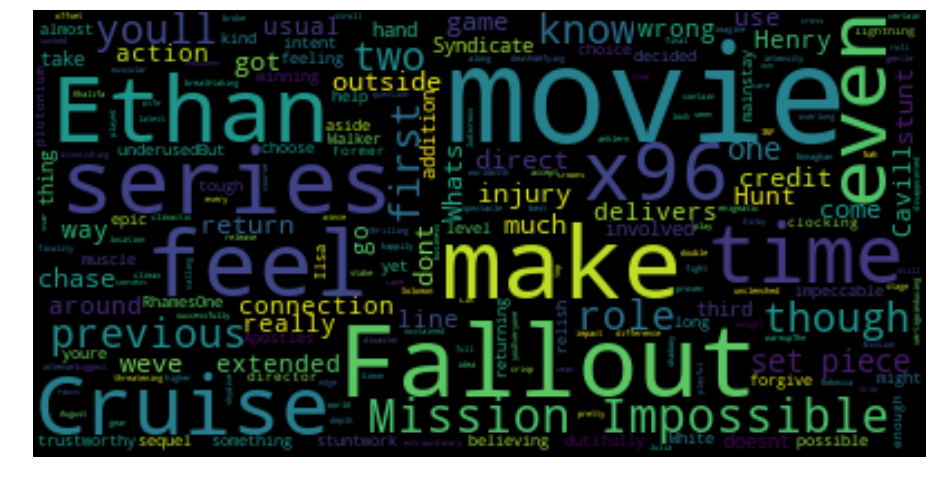

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=60).generate(normalized)
plt.figure(figsize=(16,12))

'''plot wordcloud in matplotlib'''

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Analyze the frequency of words in the text. 

In [16]:
count = {}
for w in normalized.split():
    if w in count:
        count[w] += 1
    else:
        count[w] = 1
for word, times in count.items():
    if times > 3:
        print("%s was found %d times" % (word, times))

series was found 5 times
Cruise was found 4 times
even was found 4 times
Impossible was found 4 times
time was found 4 times
Ethan was found 4 times
Fallout was found 6 times
get was found 4 times
make was found 6 times
Mission was found 4 times
x96 was found 4 times
feel was found 5 times
movie was found 12 times


### Create a Dispersion plot
The motivation behind using the Lexical Dispersion Plots was to give us an alternative means of visualising how prevalent  these words are in the text corpus, whether or not there was a clustering pattern that is whether or not a word featured heavily at certain point of the text corpus.

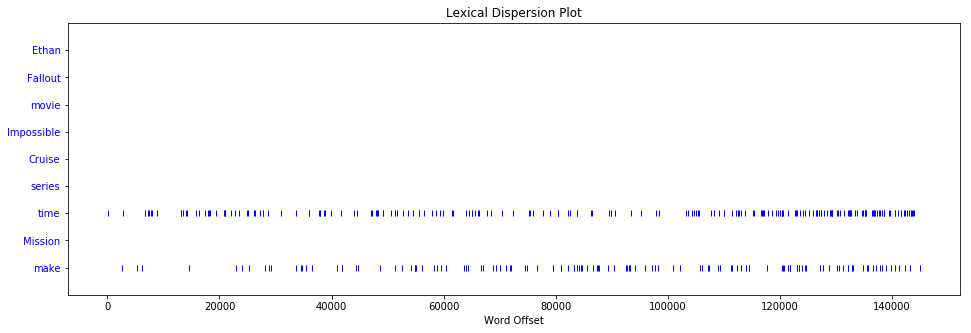

In [39]:
from nltk.book import text4 as content
plt.figure(figsize=(16,5))
topics = ['Ethan', 'Fallout','movie', 'Impossible', 'Cruise', 'series', 'time', 'Mission', 'make']
content.dispersion_plot(topics)

### Start the preprocessing for Topic Modelling

Topic Modelling is an approach for finding topics in large amounts of text. Topic modeling is great for document clustering, information retrieval from unstructured text, and feature selection.
 
Topic Modeling with Latent Dirichlet Allocation technique.

Why Latent Dirichlet Allocation? This technique can create model which can be generalized easily on any new text corpus and help us in identifying the important topics from the corpus. 

Some of the advantages are :

Training documents may come in sequentially, no random access required.

Runs in constant memory w.r.t. the number of documents: size of the training corpus does not affect memory footprint, can process corpora larger than RAM.

Is distributed & makes use of a cluster of machines, if available, to speed up model estimation.

In [18]:
import gensim
from gensim import corpora

tokenized_sents = list(sent_to_words(filtered_sentence))

# Creating the term dictionary of our corpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(tokenized_sents)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in tokenized_sents]

### Creating the object for LDA model & train the model

In [19]:
Lda = gensim.models.ldamodel.LdaModel

# Running and Training LDA model on the document term matrix by selecting minimum parameters required.
ldamodel = Lda(doc_term_matrix, num_topics=2, id2word = dictionary, passes=100)

### Extract two topics with twenty words in each topic

In [20]:
print(ldamodel.print_topics(num_topics=2, num_words=20))

[(0, '0.014*"mission" + 0.012*"theres" + 0.012*"makes" + 0.012*"even" + 0.009*"previous" + 0.009*"one" + 0.009*"two" + 0.009*"first" + 0.009*"movies" + 0.009*"though" + 0.006*"knows" + 0.006*"time" + 0.006*"usual" + 0.006*"times" + 0.006*"third" + 0.006*"weve" + 0.006*"go" + 0.006*"games" + 0.006*"involved" + 0.006*"around"'), (1, '0.024*"movie" + 0.016*"fallout" + 0.014*"series" + 0.014*"impossible" + 0.011*"get" + 0.011*"cruise" + 0.011*"feel" + 0.011*"ethan" + 0.009*"like" + 0.009*"role" + 0.009*"youll" + 0.009*"set" + 0.006*"action" + 0.006*"dont" + 0.006*"addition" + 0.006*"outside" + 0.006*"the" + 0.006*"delivers" + 0.006*"connection" + 0.006*"much"')]


#### Model perplexity and topic coherence provide a convenient measure to judge how good a given topic model is. 

In [21]:
'''Compute Perplexity'''

# a measure of how good the model is. lower the better.

print('\nPerplexity: ', ldamodel.log_perplexity(doc_term_matrix))

'''Compute Coherence Score'''

coherence_model_lda = CoherenceModel(model=ldamodel, texts=tokenized_sents, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.64265715736

Coherence Score:  0.862211700957


#### Coherence score is 'higher the better' metric and given the score of 0.86 we can be assured that we have selected the right number of topics for this corpus.

In [22]:
'''Visualize the topics'''
# pyLDAvis tool to visualize the fit of our LDA model across topics and their top words. 
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=            Freq  cluster  topics         x    y
topic                                           
1      50.437683        1       1  0.084322  0.0
0      49.562321        1       2 -0.084322  0.0, topic_info=     Category      Freq        Term     Total  loglift  logprob
term                                                           
335   Default  5.000000       movie  5.000000  30.0000  30.0000
284   Default  3.000000     fallout  3.000000  29.0000  29.0000
197   Default  3.000000     mission  3.000000  28.0000  28.0000
17    Default  3.000000      series  3.000000  27.0000  27.0000
301   Default  3.000000  impossible  3.000000  26.0000  26.0000
27    Default  2.000000      theres  2.000000  25.0000  25.0000
319   Default  2.000000       makes  2.000000  24.0000  24.0000
79    Default  2.000000        even  2.000000  23.0000  23.0000
52    Default  2.000000      cruise  2.000000  22.0000  22.0000
206   Default  2.000000         get  2.000000  21.0000  21.0000
70    Default  2.000000       ethan  2.000000  20.0000  20.0000
264   Default  2.000000        feel  2.000000  19.0000  19.0000
290   Default  2.000000         one  2.000000  18.0000  18.0000
44    Default  2.000000    previous  2.000000  17.0000  17.0000
0     Default  2.000000         two  2.000000  16.0000  16.0000
162   Default  2.000000       first  2.000000  15.0000  15.0000
107   Default  2.000000      though  2.000000  14.0000  14.0000
287   Default  2.000000      movies  2.000000  13.0000  13.0000
248   Default  2.000000        role  2.000000  12.0000  12.0000
198   Default  2.000000        like  2.000000  11.0000  11.0000
35    Default  2.000000         set  2.000000  10.0000  10.0000
97    Default  2.000000       youll  2.000000   9.0000   9.0000
54    Default  1.000000        weve  1.000000   8.0000   8.0000
22    Default  1.000000       times  1.000000   7.0000   7.0000
50    Default  1.000000       knows  1.000000   6.0000   6.0000
194   Default  1.000000        time  1.000000   5.0000   5.0000
119   Default  1.000000          go  1.000000   4.0000   4.0000
155   Default  1.000000       wrong  1.000000   3.0000   3.0000
57    Default  1.000000    involved  1.000000   2.0000   2.0000
324   Default  1.000000       games  1.000000   1.0000   1.0000
...       ...       ...         ...       ...      ...      ...
319    Topic2  2.537698       makes  2.832326   0.5921  -4.4581
79     Topic2  2.537698        even  2.832326   0.5921  -4.4581
27     Topic2  2.537698      theres  2.832326   0.5921  -4.4581
290    Topic2  1.970983         one  2.265724   0.5626  -4.7108
44     Topic2  1.970983    previous  2.265724   0.5626  -4.7108
0      Topic2  1.970983         two  2.265724   0.5626  -4.7108
107    Topic2  1.970983      though  2.265724   0.5626  -4.7108
162    Topic2  1.970983       first  2.265724   0.5626  -4.7108
287    Topic2  1.970983      movies  2.265724   0.5626  -4.7108
54     Topic2  1.404164        weve  1.699122   0.5113  -5.0499
22     Topic2  1.404164       times  1.699122   0.5113  -5.0499
145    Topic2  1.404164       usual  1.699122   0.5113  -5.0499
194    Topic2  1.404164        time  1.699122   0.5113  -5.0499
50     Topic2  1.404164       knows  1.699122   0.5113  -5.0499
119    Topic2  1.404164          go  1.699122   0.5113  -5.0499
6      Topic2  1.404164         use  1.699122   0.5113  -5.0499
245    Topic2  1.404164        make  1.699122   0.5113  -5.0499
223    Topic2  1.404164        line  1.699122   0.5113  -5.0499
105    Topic2  1.404164       third  1.699122   0.5113  -5.0499
19     Topic2  1.404164      injury  1.699122   0.5113  -5.0499
16     Topic2  1.404164      around  1.699122   0.5113  -5.0499
4      Topic2  1.404164       stunt  1.699122   0.5113  -5.0499
160    Topic2  1.404164    extended  1.699122   0.5113  -5.0499
324    Topic2  1.404164       games  1.699122   0.5113  -5.0499
155    Topic2  1.404164       wrong  1.699122   0.5113  -5.0499
92     Topic2  1.404164         got  1.699122   0

#### We can observe that our LDA model has captured the prominent keywords under two topics in the text corpus which will give us a good understanding of what the text corpus is about. We can do further analysis by using this information to generate recommendations & classify the text for user profiling or push notifications. 

## In the next section, we will see how we can summarize and visualize news article!

In [30]:
'''Extract the first article of the news feed'''

url = urllib.request.urlopen('http://feeds.bbci.co.uk/news/rss.xml').read()
feed = BeautifulSoup(url.decode('utf8'),'lxml')
urls_to_summarize = list(map(lambda p: p.text, feed.find_all('guid')))
for article_url in urls_to_summarize[:1]:
    title, text = extract_title_text(article_url)
    print ('-------------------------------------------------------------------------------------------------------------------')
    print('Printing title & text')
    print('-----------------------')
    print (title, text)
    print ('-------------------------------------------------------------------------------------------------------------------')
    print('Printing title & summary')
    print('--------------------------')
    print (title)
    for s in get_summary(text, 0.2):
        print((s))
    print ('-------------------------------------------------------------------------------------------------------------------')
    print('Printing Keywords')
    print('--------------------------')
    for i in get_keywords(text):
        print((i))

-------------------------------------------------------------------------------------------------------------------
Printing title & text
-----------------------
Brexit: Cabinet meeting kicks off crucial 48 hours - BBC News  Share this with Email Facebook Messenger Messenger Twitter Pinterest WhatsApp LinkedIn Copy this link These are external links and will open in a new window Theresa May will try to rally ministers behind her this morning at the start of a critical 48 hours for Brexit.  On Monday, the PM told MPs an agreement with the EU was "still achievable" despite apparent deadlock over the issue of the Irish border. EU officials, though, have warned no-deal is "more likely than ever before". The clock is ticking down towards a summit of European leaders on Wednesday where it had been hoped a deal could be reached.  The UK is due to leave the EU in March and it had been hoped that on Wednesday EU leaders would agree that enough progress had been made to call a special summit in 

In [32]:
_title = []
_text = []
_summarized_text = []

for article_url in urls_to_summarize[:1]:
    title, text = extract_title_text(article_url)
    new_text = get_summary(text, 0.3)
    _title.append(title), _text.append(text), _summarized_text.append(new_text)

In [34]:
article_text = _text[0]
stop_words = set(stopwords.words('english'))
lemma = WordNetLemmatizer()
word_tokens = word_tokenize(str(article_text)) 
filtered_sentence = [w for w in word_tokens if not w in stop_words]
normalized = " ".join(lemma.lemmatize(word) for word in filtered_sentence)

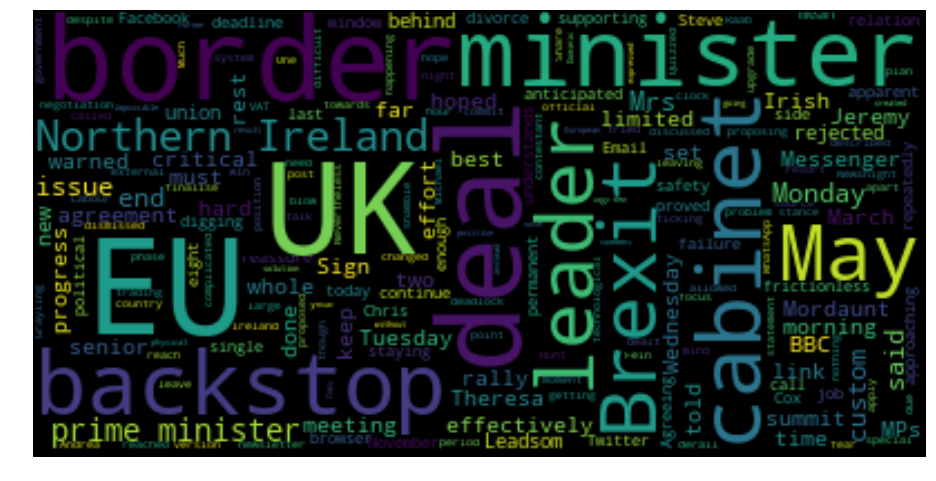

In [37]:
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=60).generate(normalized)
plt.figure(figsize=(16,12))

'''plot wordcloud in matplotlib'''

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

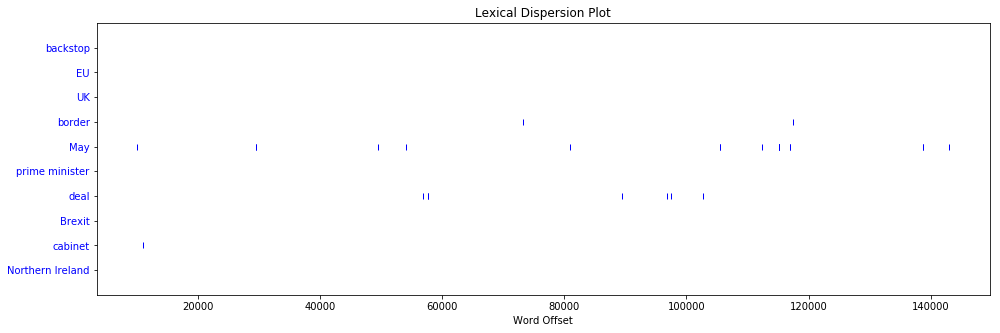

In [38]:
from nltk.book import text4 as content
plt.figure(figsize=(16,5))
topics = ['backstop', 'EU','UK', 'border', 'May', 'prime minister', 'deal', 'Brexit', 'cabinet', 'Northern Ireland']
content.dispersion_plot(topics)

### We can observe that 'May' is being discussed throughout the article along with references to border, deal & cabinet. 

In [40]:
tokenized_sents = list(sent_to_words(filtered_sentence))

# Creating the term dictionary of our corpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(tokenized_sents)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in tokenized_sents]

In [41]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Training LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=2, id2word = dictionary, passes=100)

# Print the model output
print(ldamodel.print_topics(num_topics=2, num_words=20))

[(0, '0.031*"eu" + 0.028*"uk" + 0.025*"would" + 0.016*"ministers" + 0.016*"backstop" + 0.016*"minister" + 0.016*"ireland" + 0.013*"may" + 0.010*"end" + 0.010*"said" + 0.010*"customs" + 0.010*"issue" + 0.007*"limited" + 0.007*"time" + 0.007*"irish" + 0.007*"leadsom" + 0.007*"hard" + 0.007*"mordaunt" + 0.007*"mps" + 0.007*"best"'), (1, '0.026*"the" + 0.023*"deal" + 0.023*"border" + 0.017*"cabinet" + 0.014*"brexit" + 0.014*"prime" + 0.014*"northern" + 0.011*"monday" + 0.011*"leaders" + 0.011*"mrs" + 0.008*"new" + 0.008*"sign" + 0.008*"keep" + 0.008*"theresa" + 0.008*"senior" + 0.008*"hoped" + 0.008*"warned" + 0.008*"behind" + 0.008*"agreement" + 0.008*"told"')]


In [42]:
'''Compute Perplexity'''

# a measure of how good the model is. Lower the better.
print('\nPerplexity: ', ldamodel.log_perplexity(doc_term_matrix))

'''Compute Coherence Score'''

coherence_model_lda = CoherenceModel(model=ldamodel, texts=tokenized_sents, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.2762254303

Coherence Score:  0.856875410278


In [43]:
'''Visualize the topics'''
# pyLDAvis tool to visualize the fit of our LDA model across topics and their top words. 
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=            Freq  cluster  topics       x    y
topic                                         
0      50.743313        1       1  0.0979  0.0
1      49.256695        1       2 -0.0979  0.0, topic_info=     Category      Freq       Term     Total  loglift  logprob
term                                                          
197   Default  6.000000         eu  6.000000  30.0000  30.0000
189   Default  5.000000         uk  5.000000  29.0000  29.0000
56    Default  5.000000        the  5.000000  28.0000  28.0000
210   Default  5.000000      would  5.000000  27.0000  27.0000
4     Default  4.000000       deal  4.000000  26.0000  26.0000
156   Default  4.000000     border  4.000000  25.0000  25.0000
179   Default  3.000000    cabinet  3.000000  24.0000  24.0000
69    Default  3.000000  ministers  3.000000  23.0000  23.0000
52    Default  3.000000   minister  3.000000  22.0000  22.0000
25    Default  3.000000   backstop  3.000000  21.0000  21.0000
61    Default  3.000000    ireland  3.000000  20.0000  20.0000
8     Default  2.000000     brexit  2.000000  19.0000  19.0000
252   Default  2.000000      prime  2.000000  18.0000  18.0000
155   Default  2.000000   northern  2.000000  17.0000  17.0000
265   Default  2.000000        may  2.000000  16.0000  16.0000
28    Default  2.000000     monday  2.000000  15.0000  15.0000
198   Default  2.000000    leaders  2.000000  14.0000  14.0000
126   Default  2.000000        mrs  2.000000  13.0000  13.0000
142   Default  2.000000        end  2.000000  12.0000  12.0000
93    Default  2.000000       said  2.000000  11.0000  11.0000
3     Default  2.000000      issue  2.000000  10.0000  10.0000
2     Default  2.000000    customs  2.000000   9.0000   9.0000
74    Default  1.000000        new  1.000000   8.0000   8.0000
81    Default  1.000000    theresa  1.000000   7.0000   7.0000
123   Default  1.000000     senior  1.000000   6.0000   6.0000
73    Default  1.000000       keep  1.000000   5.0000   5.0000
166   Default  1.000000      hoped  1.000000   4.0000   4.0000
16    Default  1.000000       must  1.000000   3.0000   3.0000
101   Default  1.000000  agreement  1.000000   2.0000   2.0000
95    Default  1.000000       told  1.000000   1.0000   1.0000
...       ...       ...        ...       ...      ...      ...
4      Topic2  4.488354       deal  4.796719   0.6417  -3.7819
156    Topic2  4.487462     border  4.796710   0.6415  -3.7821
179    Topic2  3.287447    cabinet  3.596779   0.6182  -4.0932
8      Topic2  2.689000     brexit  2.996828   0.5997  -4.2942
252    Topic2  2.687411      prime  2.996813   0.5992  -4.2948
155    Topic2  2.687410   northern  2.996812   0.5992  -4.2948
28     Topic2  2.087331     monday  2.396847   0.5699  -4.5475
198    Topic2  2.087331    leaders  2.396847   0.5699  -4.5475
126    Topic2  2.087330        mrs  2.396847   0.5699  -4.5475
81     Topic2  1.487149    theresa  1.796879   0.5189  -4.8865
123    Topic2  1.487149     senior  1.796879   0.5189  -4.8865
237    Topic2  1.487149       sign  1.796879   0.5189  -4.8865
73     Topic2  1.487149       keep  1.796879   0.5189  -4.8865
74     Topic2  1.487149        new  1.796879   0.5189  -4.8865
166    Topic2  1.487149      hoped  1.796879   0.5189  -4.8865
138    Topic2  1.487149       rest  1.796879   0.5189  -4.8865
167    Topic2  1.487149      march  1.796879   0.5189  -4.8865
200    Topic2  1.487149    meeting  1.796879   0.5189  -4.8865
269    Topic2  1.487149      union  1.796879   0.5189  -4.8865
101    Topic2  1.487149  agreement  1.796879   0.5189  -4.8865
127    Topic2  1.487149        bbc  1.796879   0.5189  -4.8865
113    Topic2  1.487149     summit  1.796879   0.5189  -4.8865
95     Topic2  1.487149       told  1.796879   0.5189  -4.8865
258    Topic2  1.487149  messenger  1.796879   0.5189  -4.8865
260    Topic2  1.487149  wednesday  1.796879   0.5189  -4.8865
72     Topic2  1.487149     warned  1.796879   0.5189  -4.8865
262    Topic2  1.487149     behind  1.796879   0.518

### We have seen how to summarize & visualize a document as well as a news article to get quick information about the data. This methodology can be applied to lot of usecases to extract insights from unstructured data.